In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("data_475.csv", sep=",")
data = data.drop(["Unnamed: 0"], axis=1)

In [7]:
print("The data has the following known nodes: {}.".format(data.keys()))
print("We are given {} samples per node.".format(len(data['A'])))

The data has the following known nodes: Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object').
We are given 100 samples per node.


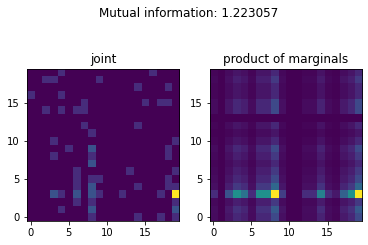

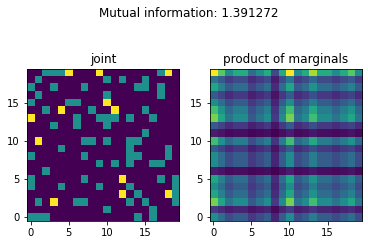

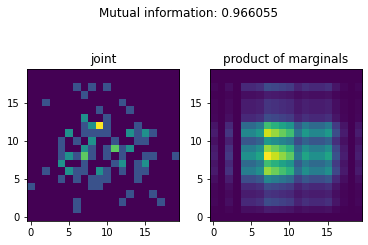

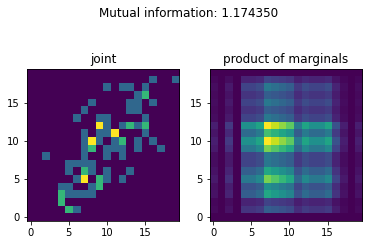

In [6]:
def MI(x,y,Nbins=21):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xy_joint.T,origin='lower')
    plt.title('joint')
    plt.subplot(1,2,2)
    plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
    plt.title('product of marginals')
    MI=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    plt.suptitle('Mutual information: %f'%MI)
    return(MI)

x = data['A']
y = data['B']

MI(x,y)
MI(np.random.rand(len(x))*2-1,np.random.rand(len(x))*2-1)

xn=np.random.randn(len(x))
yn=np.random.randn(len(x))
yn1=xn+yn
MI(xn,yn)
MI(xn,yn1);

Little can be concluded using mutal information, since we only have 100 samples. 

# Visualizing correlation

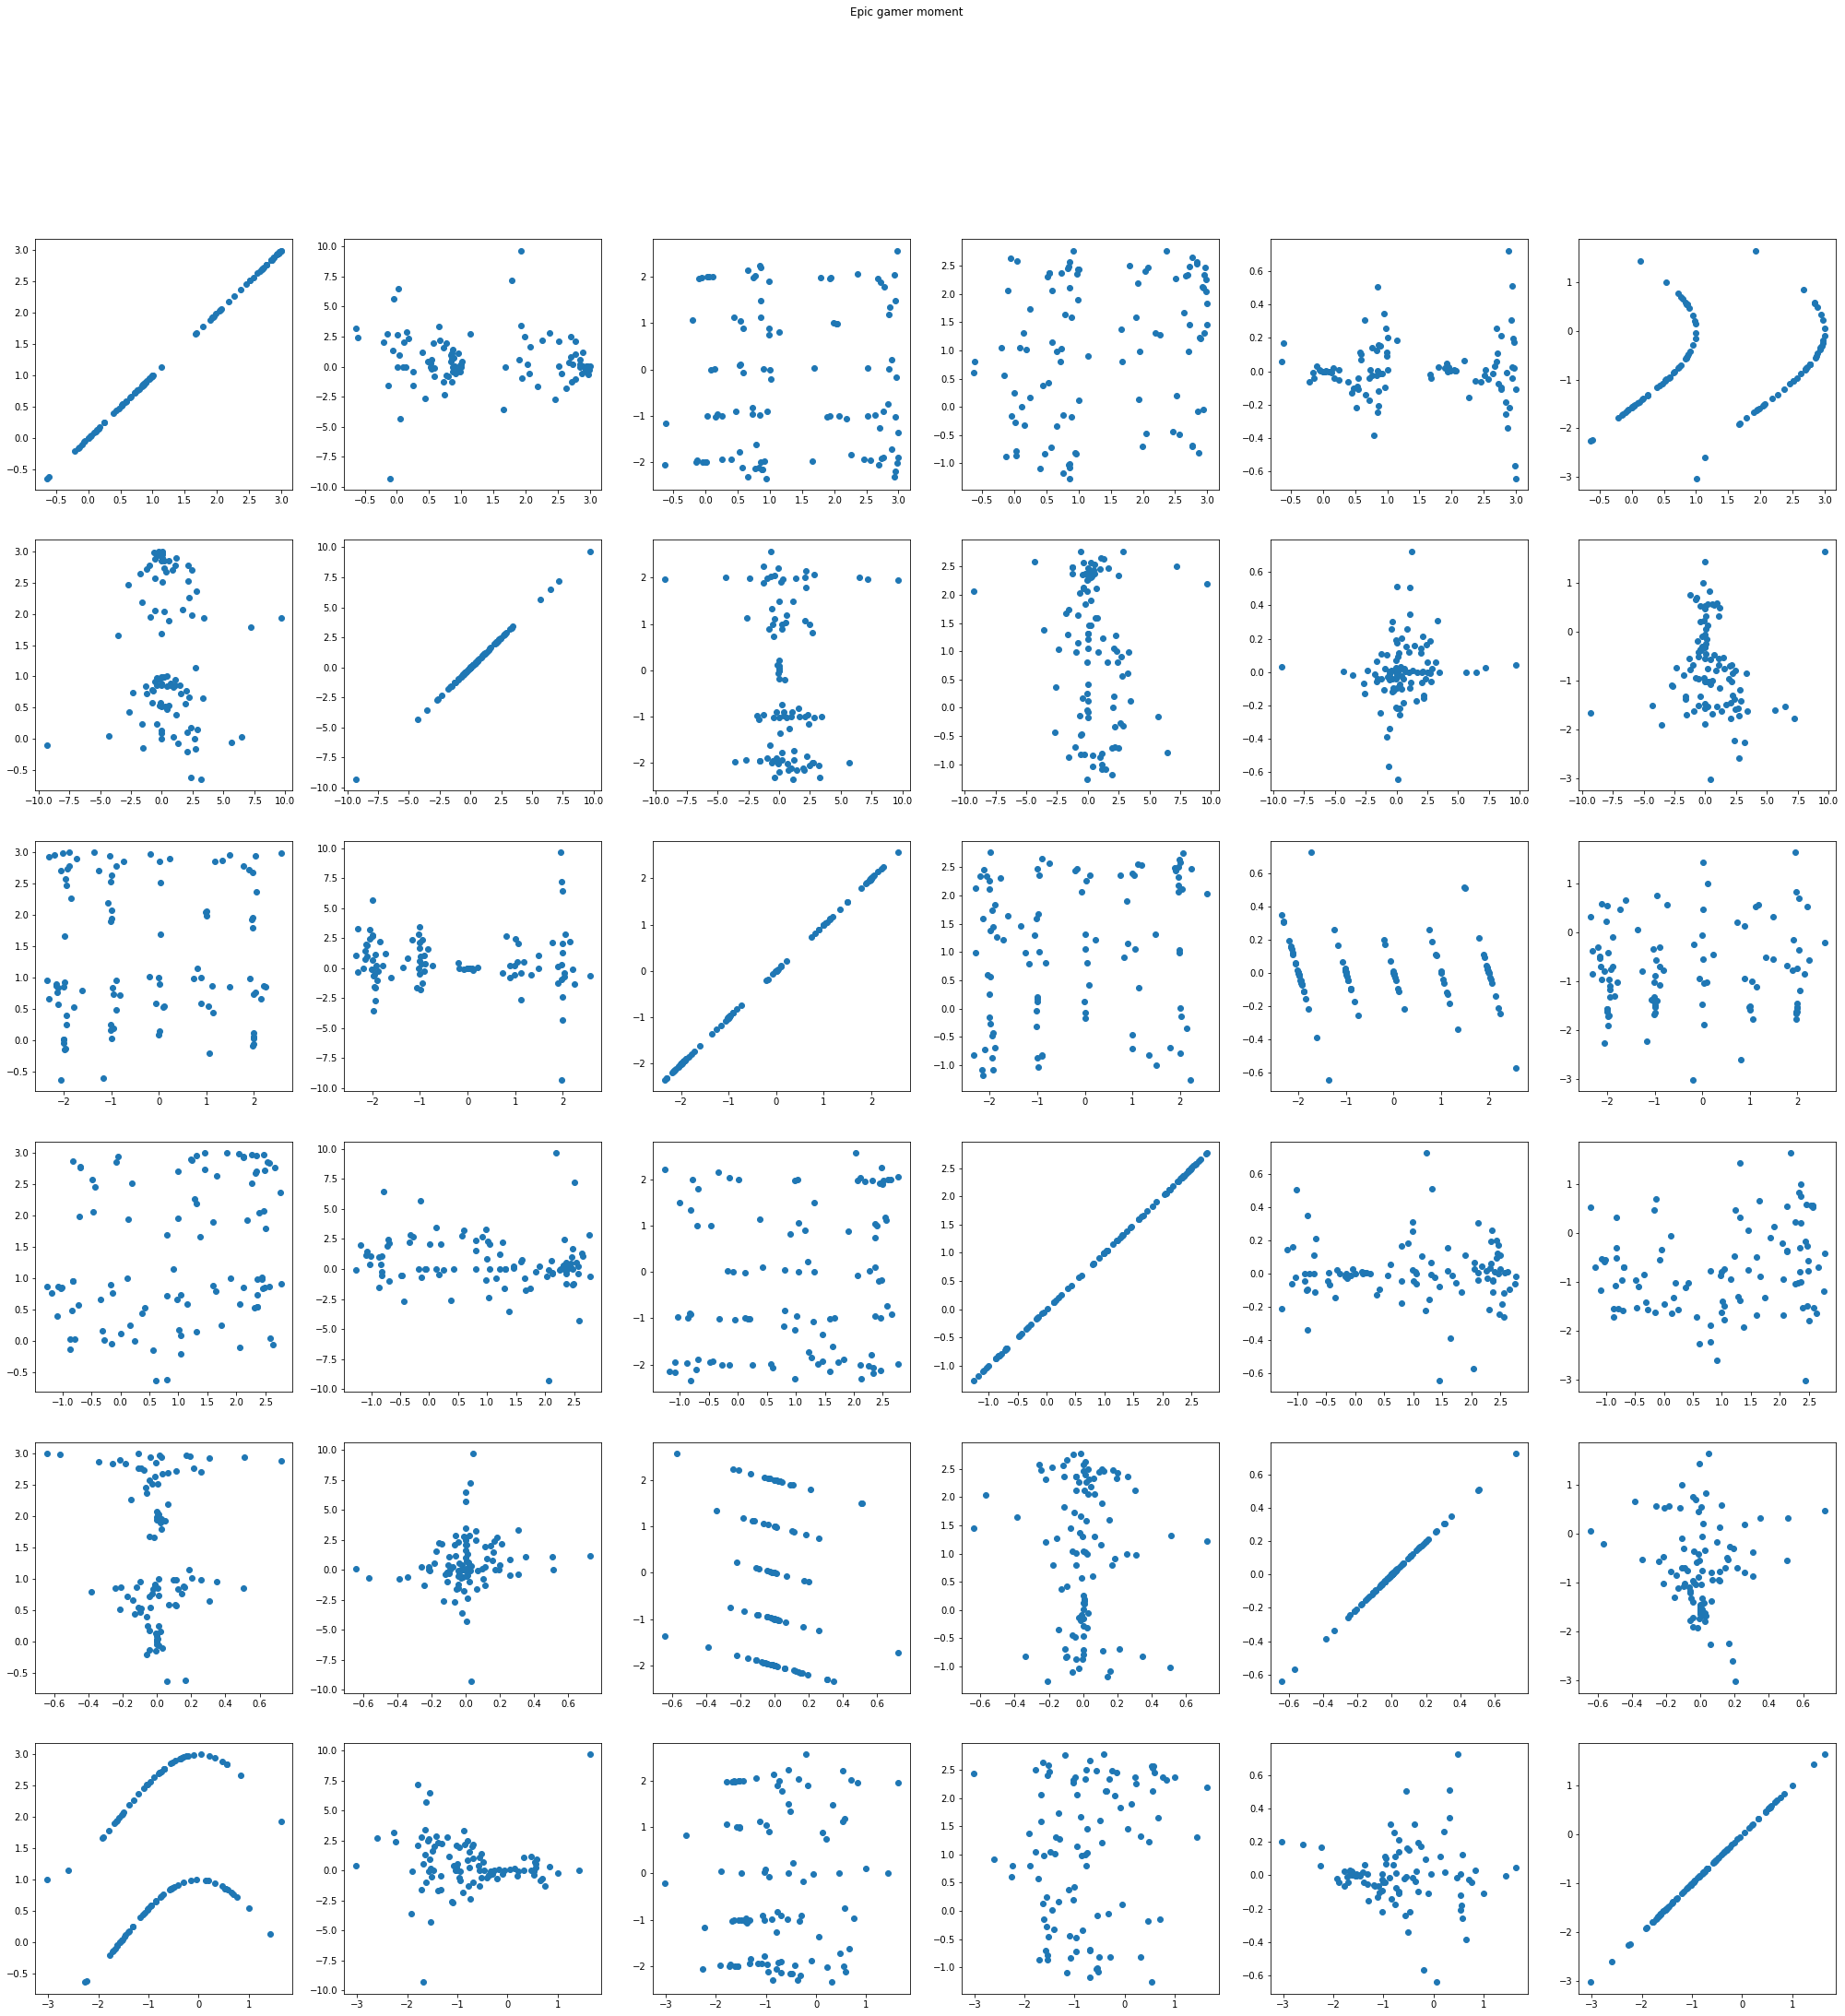

In [8]:
fig, axs = plt.subplots(6, 6)
fig.set_size_inches(35, 35)
fig.suptitle('Epic gamer moment')

columns = ['A', 'B', 'C', 'D', 'E', 'F']
for i in range(6):
    for j in range(6):
        axs[i,j].scatter(data[columns[i]], data[columns[j]])

plt.show()

# Visualizing the distributions

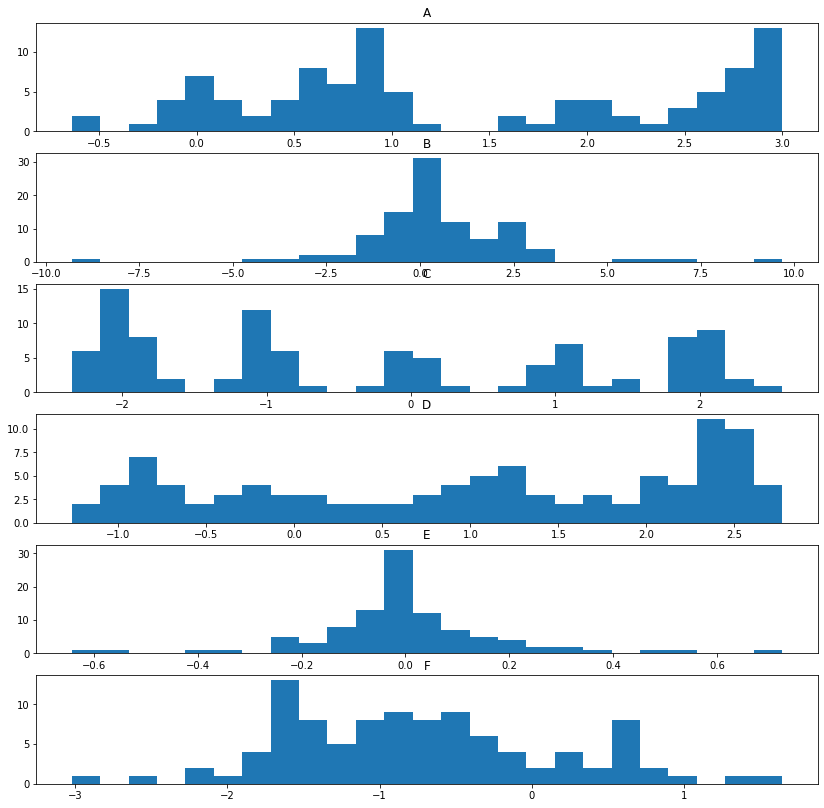

In [9]:
fig, axs = plt.subplots(6, figsize=(14,14))
for i, node in enumerate(data.keys()):
    axs[i].title.set_text(f"{node}")
    axs[i].hist(data[node], bins=25)
plt.show()

# Conclusion
It seems as though B and E follow a normal distribution almost perfectly. One may suspect that on of them is in fact the confounder. 

# Statistics


---A---
mean: 1.3698896094718327
std: 1.1014896644832854
corr with B: -0.06253659329663087 	 MI A to B: 0.25580163371401654
corr with C: 0.019117421165012752 	 MI A to C: 0.8351836575806946
corr with D: 0.2421245109719529 	 MI A to D: 1.1991728277617537
corr with E: -0.030382909330626144 	 MI A to E: 1.2315011294594767
corr with F: 0.28523802685823446 	 MI A to F: 1.5704870503086719

---B---
mean: 0.5407399611575715
std: 2.236391824250834
corr with A: -0.06253659329663087 	 MI B to A: 1.2230566878314777
corr with C: -0.046467151416411175 	 MI B to C: 1.2061683797974188
corr with D: -0.1412290518376609 	 MI B to D: 1.4404842775897064
corr with E: 0.14184360612389277 	 MI B to E: 1.1255084038531336
corr with F: -0.05166111960699988 	 MI B to F: 1.1660889838766195

---C---
mean: -0.26510669570840895
std: 1.5564606014451707
corr with A: 0.019117421165012752 	 MI C to A: 1.1754108309284201
corr with B: -0.046467151416411175 	 MI C to B: 0.2868409328851407
corr with D: 0.1599472384210667 	 

C:\Users\arian\AppData\Local\Temp/ipykernel_13600/2070617805.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


corr with D: 0.1901532022965553 	 MI F to D: 1.1997925474153723
corr with E: -0.04764964385175539 	 MI F to E: 1.8021588931201444


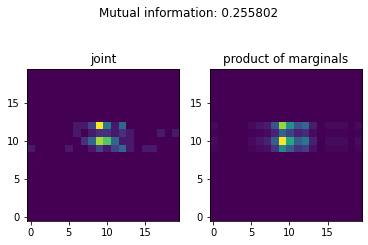

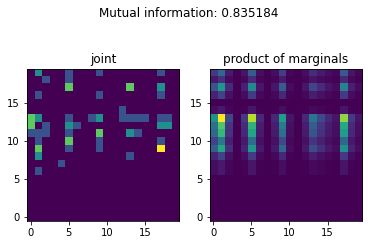

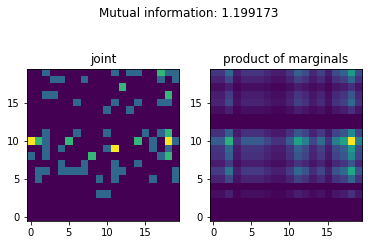

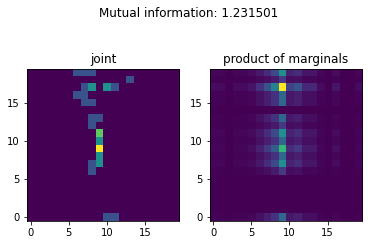

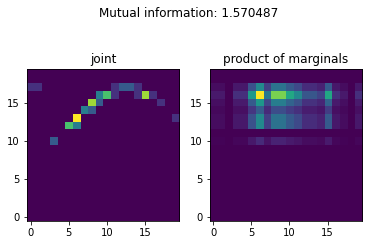

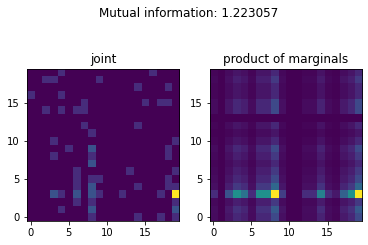

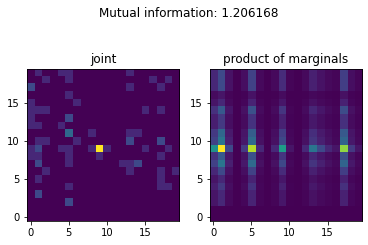

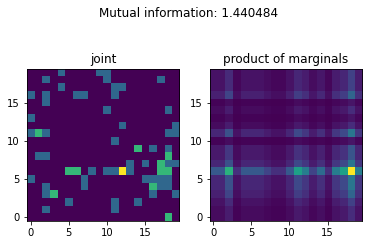

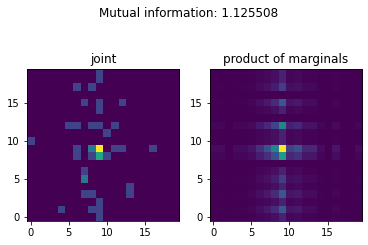

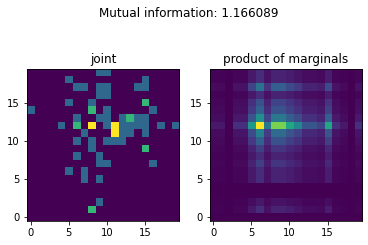

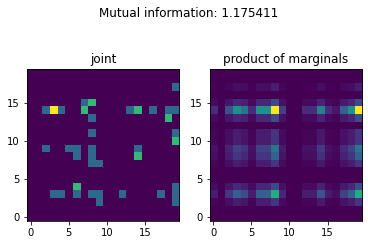

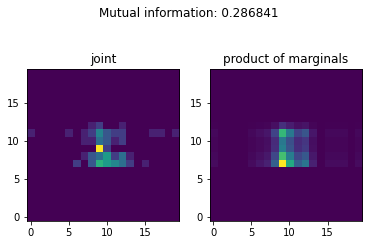

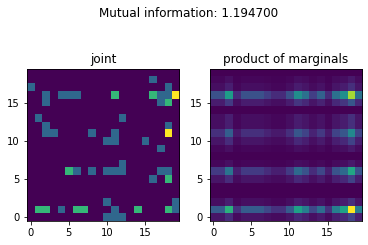

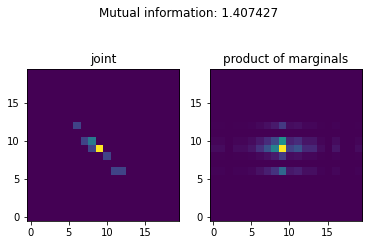

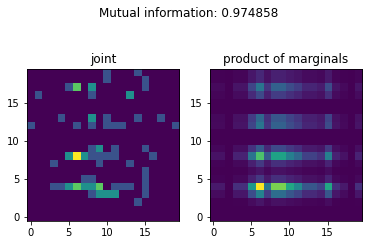

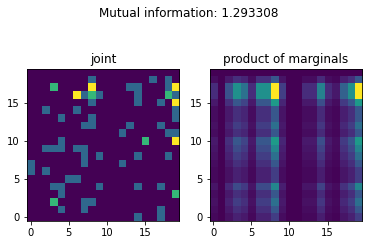

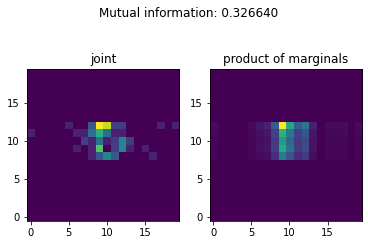

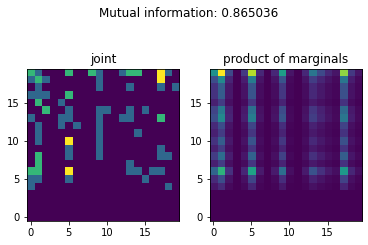

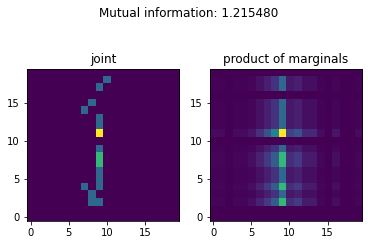

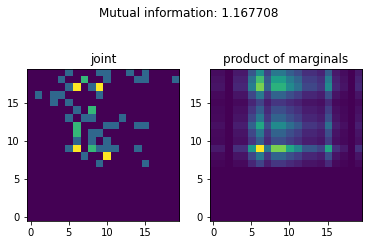

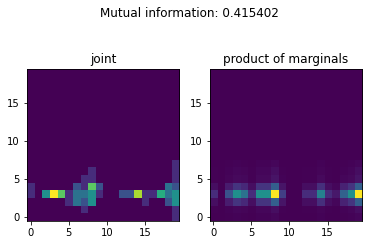

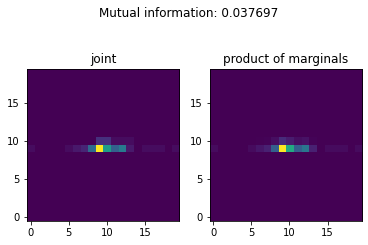

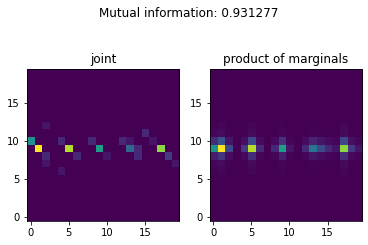

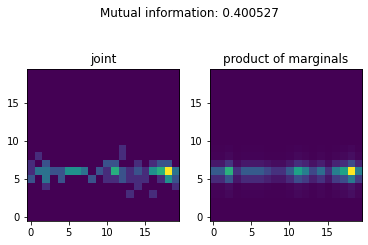

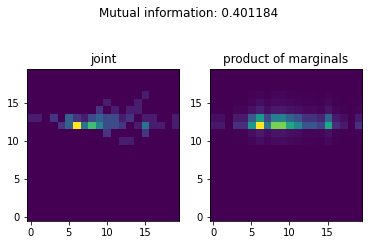

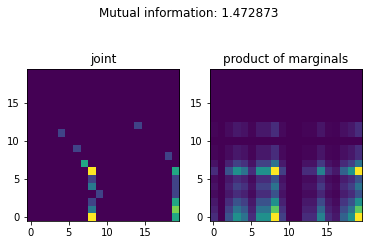

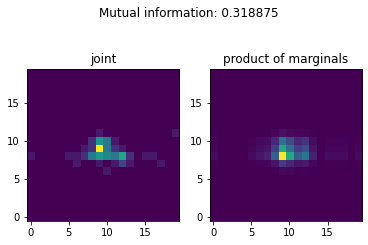

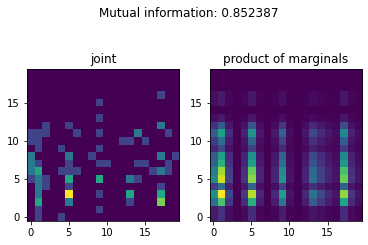

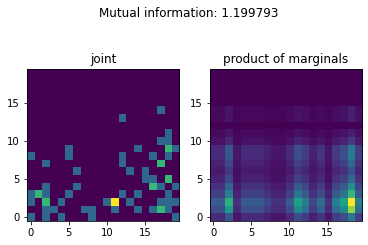

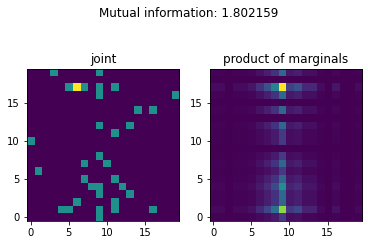

In [10]:
for node in data.keys():
    print(f"\n---{node}---")
    print(f"mean: {np.mean(data[node])}")
    print(f"std: {np.std(data[node])}")
    for node_2 in data.keys():
        a, b = np.array(data[node].tolist()), np.array(data[node_2].tolist())
        ab = np.stack((a,b))
        cov = np.corrcoef(ab)
        if node != node_2:
            print(f"corr with {node_2}: {cov[0,1]} \t MI {node} to {node_2}: {MI(data[node_2], data[node], Nbins=21)}")